# Tarea 1 MA5203
Mauricio Romero Jofré

## P1 Máxima verosimilitud
Dada la información entregada en el enunciado, es posible ver que los científicos A y B son poco confiables en su estimación, debido a que se alejan demasiado de donde debería estar el parámetro $\mu$. Como es asumido que cada estimación de los científicos distribuye como una normal de media $\mu$ y varianza $\sigma_{i}$, la varianza de los científicos A y B es salvajemente grande respecto a la del resto. <br \>
Para encontrar el parámetro óptimo se puede utilizar un estimador de máxima verosimilitud para la media $\mu$ como también las varianzas $\sigma_{i}$. En este caso, existe una expresión teórica que consiste en maximizar la verosimilitud para cada parámetro, mediante la igualación a cero de las derivadas para cada uno.

## P2 Regresión lineal

In [2]:
!pip install numpy
!pip install matplotlib
!pip install pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
%matplotlib inline

Text(0,0.5,'mediana_valor k$')

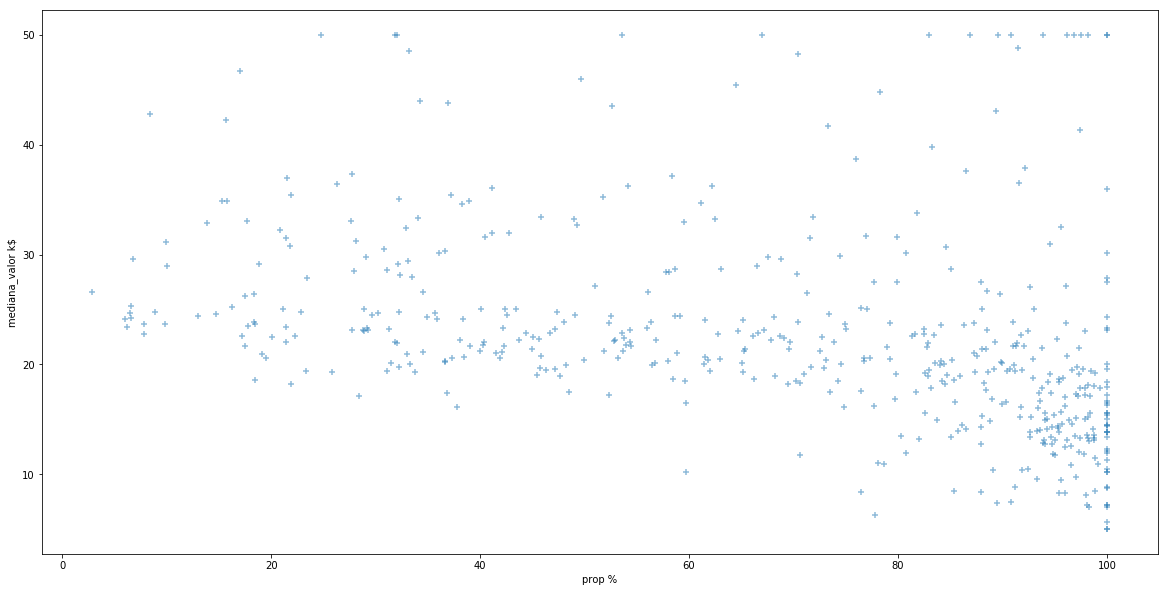

In [28]:
# carga de datos
direc = '/home/mauricio/Documents/Uni/Aprendizaje_de_maquinas_probabilistico/'
datos = pd.read_csv('datosT1.csv', delimiter=',', header=None)
datos.columns = ['prop', 'med_val']

# plot
plt.scatter(datos['prop'], datos['med_val'], alpha=0.5, marker='+')
plt.xlabel('prop %')
plt.ylabel('mediana_valor k$')

La ecuación matemática que resuelve la regresión con regularización ridge es: <br \>
$\theta = (\bar{X}^{T}\bar{X} + \rho \mathbb{1})^{-1}\bar{X}^{T}Y$ <br \>

[-0.12316272 30.97867776]
[-0.11282786 30.1507927 ]
[-0.10303107 29.36600972]
[-0.09373141 28.6210482 ]


Text(0.5,1,'Muestras y prediccion segun regularizacion')

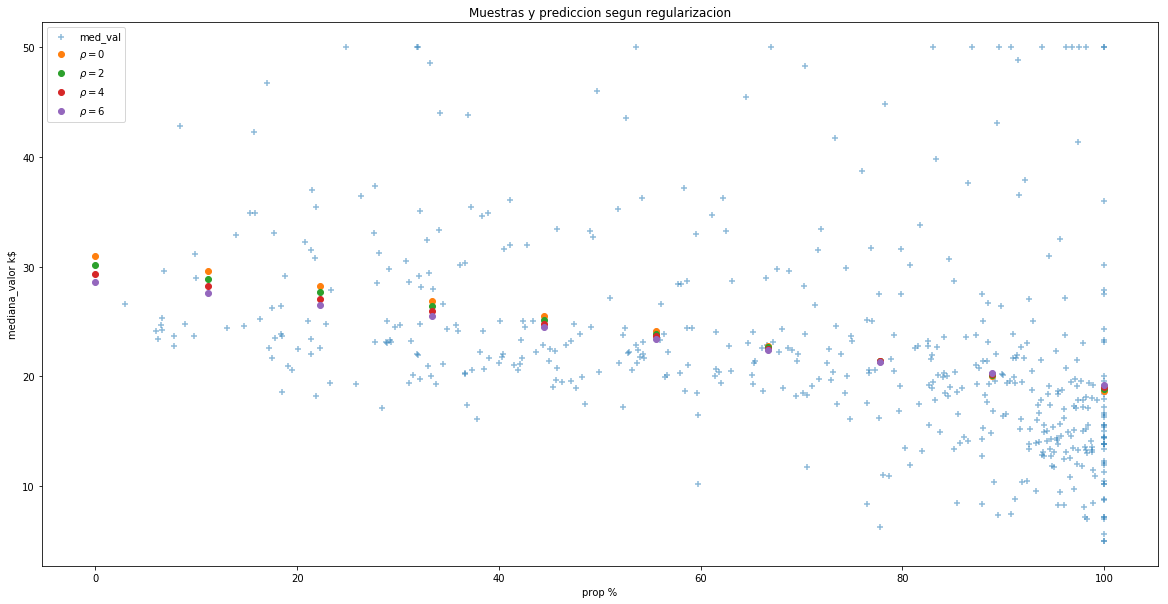

In [36]:
# regresion
matplotlib.rcParams['figure.figsize'] = (20, 10)
fg = (100, 100)
X = np.vstack((datos['prop'], np.ones(len(datos)))).T
Y = datos['med_val'].values
rec = np.linspace(0, 100, 10)
plt.scatter(datos['prop'], datos['med_val'], alpha=0.5, marker='+')
plt.xlabel('prop %')
plt.ylabel('mediana_valor k$')
T = []
rhos = np.arange(0, 7, 2)
for rho in rhos:
    Theta = np.linalg.inv(X.T@X + rho*np.identity(2))@X.T@Y
    T.append(Theta)
    print(Theta)
    reg = Theta[0]*rec + Theta[1]   
    plt.scatter(rec, reg, label=r'$\rho = $'+str(rho), marker='o')
T = np.array(T)
plt.legend()
plt.title('Muestras y prediccion segun regularizacion')

A medida que el parámetro de regularización aumenta, la pendiente de la curva aumenta (se vuelve menos negativa) y el intercepto disminuye. Si se piensa que ruido y trata de no pescar el ruido